# Exploring cluster techniques

In [90]:
import pandas as pd
# Import `pyplot` and `numpy`
import matplotlib.pyplot  as plt
import matplotlib.pylab as plb
import numpy as np
import seaborn as sns
import datetime
import numexpr
import bottleneck
import feather
import random


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 500
pd.options.display.max_columns = 200 
pd.set_option('display.float_format', lambda x: '%.3f' % x) #display numbers as decimals instead of scientific value

data_filepath = 'movie_metadata_cleaned_v1.feather'

plt.rcParams["font.size"] = (14)

In [2]:
df = feather.read_dataframe(data_filepath)
print (df.shape[0] ,'movies imported')

df_movies = df.set_index(df['movie_title'])

4916 movies imported


In [3]:
df.describe(include='all')

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio
count,4916,4916.000,4916.000,4916,4916,4916,4916,4916,4916.000,4916,4916,4916,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916,4916,4916.000,4916.000
unique,4916,nan,nan,66,48,914,4757,2398,nan,2096,3031,3520,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,18,2,nan,nan
top,After.Life,nan,nan,USA,English,Drama,,,nan,Robert De Niro,Morgan Freeman,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,R,Color,nan,nan
freq,1,nan,nan,3710,4582,232,152,102,nan,48,18,23,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2367,4712,nan,nan
mean,NaN,2002.453,6.437,NaN,NaN,NaN,NaN,NaN,676.677,NaN,NaN,NaN,6485.200,1617.624,628.313,9579.733,7348.296,266.525,136.617,82645.242,47779121.547,33576517.195,NaN,NaN,107.092,2.096
std,NaN,12.315,1.128,NaN,NaN,NaN,NaN,NaN,2805.134,NaN,NaN,NaN,15098.229,4006.861,1622.642,18164.359,19206.016,372.547,120.418,138322.057,61184608.962,38653472.075,NaN,NaN,25.247,0.289
min,NaN,1916.000,1.600,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,162.000,218.000,NaN,NaN,7.000,1.180
25%,NaN,1999.000,5.800,NaN,NaN,NaN,NaN,NaN,6.000,NaN,NaN,NaN,606.000,275.000,129.000,1394.750,0.000,62.000,47.000,8361.750,8052632.500,7000000.000,NaN,NaN,93.000,1.850
50%,NaN,2005.000,6.600,NaN,NaN,NaN,NaN,NaN,44.000,NaN,NaN,NaN,981.500,592.000,362.000,3049.000,159.000,152.000,106.500,33132.500,36948242.000,23000000.000,NaN,NaN,103.000,2.220
75%,NaN,2010.000,7.200,NaN,NaN,NaN,NaN,NaN,188.000,NaN,NaN,NaN,11000.000,912.000,631.000,13616.750,2000.000,319.250,191.000,93772.750,50875351.250,40000000.000,NaN,NaN,118.000,2.350


#### Pre Create some arrays for analysis

In [4]:
movies_list = list(df['movie_title'])

In [5]:
values_array = df_movies[[
    'title_year'
    ,'imdb_score'
    ,'num_critic_for_reviews'
    ,'budget'
    ,'aspect_ratio'
]]

In [6]:
movies_list[0:5]
values_array.head()


['Gods and Monsters',
 'Runner Runner',
 'Antitrust',
 'Lady in White',
 'Dead Man Down']

,title_year,imdb_score,num_critic_for_reviews,budget,aspect_ratio
movie_title,,,,,
Gods and Monsters,1998.000,7.500,127.000,3500000.000,2.350
Runner Runner,2013.000,5.600,184.000,30000000.000,2.350
Antitrust,2001.000,6.100,123.000,30000000.000,2.350
Lady in White,1988.000,6.700,130.000,4700000.000,1.850
Dead Man Down,2013.000,6.500,217.000,30000000.000,2.350


### Known titles list exemples

In [7]:
words =['Lord of the rings', 'Transformers', 'The Godfather'
        , 'Snow White and the Seven Dwarfs', 'Pinocchio', 'Fantasia'
       , 'Sharknado'
        ,'Love actually'
        ,'Pretty woman'
        ,'Romeo + Juliet'
       ]
words = [element.lower() for element in words]

ex_ilocs=[]

i=0
for title in movies_list:
    title = title.lower()
    for word in words:
        if word in title:
            ex_ilocs.append(i)
            
    i+=1
    
ex_df = df.iloc[ex_ilocs,:]
ex_movies_list = list(ex_df['movie_title'])
ex_df.shape

(19, 26)

### Trying KMeans clustering

#### Only with year & imdb_score

In [8]:
from sklearn.cluster import KMeans

In [84]:
samples = np.array(values_array.iloc[:,[0,1]])

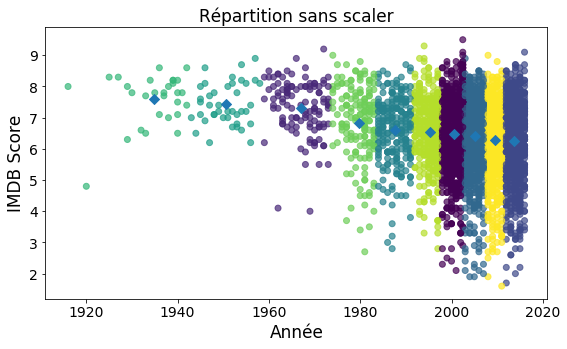

In [92]:
plt.rcParams["figure.figsize"] = (9,5)
model = KMeans(n_clusters = 10)

labels = model.fit_predict(samples)

plt.scatter(samples[:,0],samples[:,1], c=labels, alpha=0.7)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="D", s=50)


silent = plt.title("Répartition sans scaler", fontsize=17)
silent = plt.xlabel('Année',  fontsize=17)
silent = plt.ylabel('IMDB Score',  fontsize=17)

In [86]:
values_array.dtypes

title_year                float64
imdb_score                float64
num_critic_for_reviews    float64
budget                    float64
aspect_ratio              float64
dtype: object

### Kmeans + StandardScaler

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

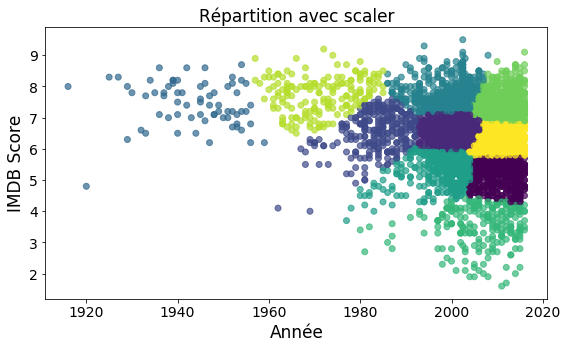

In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(samples)
labels = pipeline.predict(samples)

plt.scatter(samples[:,0], samples[:,1], c=labels, alpha=0.7)

silent = plt.title("Répartition avec scaler", fontsize=17)
silent = plt.xlabel('Année',  fontsize=17)
silent = plt.ylabel('IMDB Score',  fontsize=17)

#### Displaying labels

In [13]:

def rand_plt_labels(x, y, nb_items = 10, labels_list = movies_list):
    hfont = {'weight':'bold', 'color':'red'}
    rand_list=[]
    for i in range(nb_items):
        rand_list.append(random.randint(0, len(movies_list)-1))
        
    for rand_num in rand_list:
        plt.annotate(labels_list[rand_num], (x[rand_num], y[rand_num])
                    , fontsize=20
                    , alpha=0.75
                    ,arrowprops=dict(facecolor='black', shrink=0.05)
                    ,**hfont
                    )
    plt.show()
    
def ex_plt_labels(x, y, c='default', cmap='tab20', nb_items = 10, labels_list = movies_list):
    custom_cmap = plt.get_cmap(cmap)
    cmaplist = [custom_cmap(i) for i in range(custom_cmap.N)]
    print(cmaplist[0])
    color = 'red'
    for iloc in ex_ilocs:
        if  c!='default':
            movie_group = c[iloc]
            color = cmaplist[movie_group]
        hfont = {'weight':'bold', 'color':color}
        plt.annotate(labels_list[iloc], (x[iloc], y[iloc])
                    , fontsize=20
                    , alpha=0.9
                    ,arrowprops=dict(facecolor='black', shrink=0.05)
                    ,**hfont
                    )
    plt.show()



(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)


C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


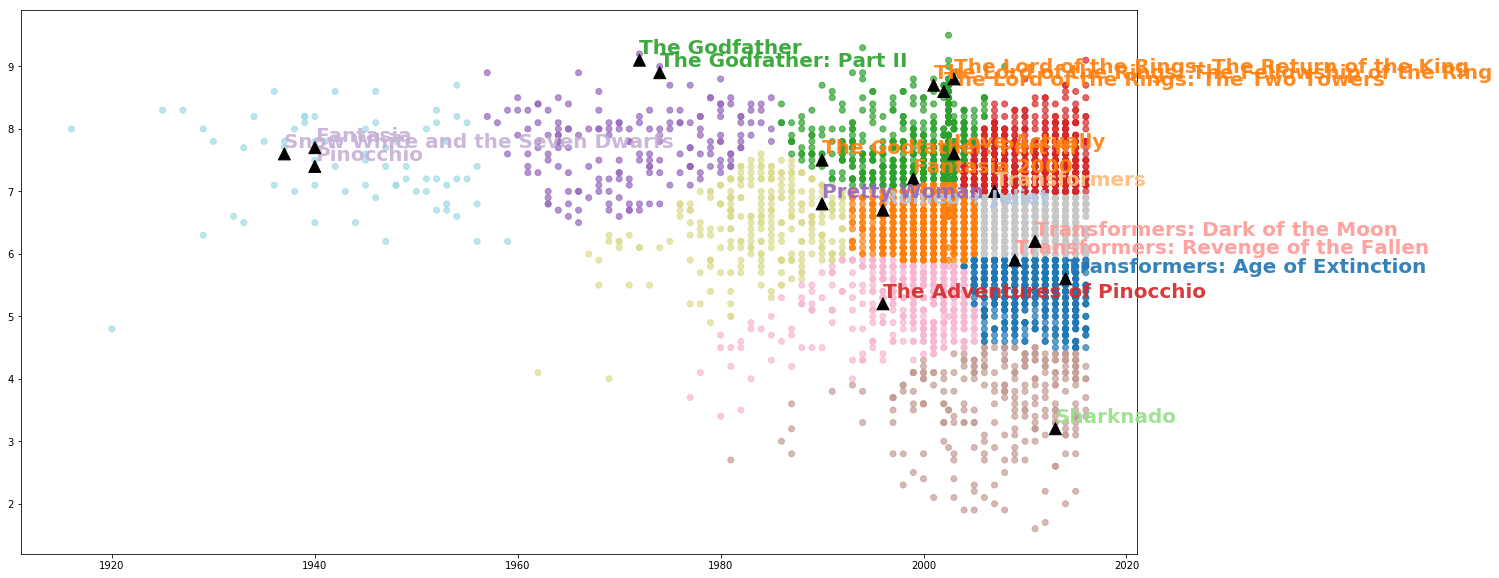

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(samples[:,0], samples[:,1], c=labels, alpha=0.7, cmap='tab20')
ex_plt_labels(list(samples[:,0]),list(samples[:,1]),  c=labels)

### Trying Kmeans+StandardScaler with more dimensions

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

array([5, 2, 5, ..., 3, 3, 3])

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)


C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


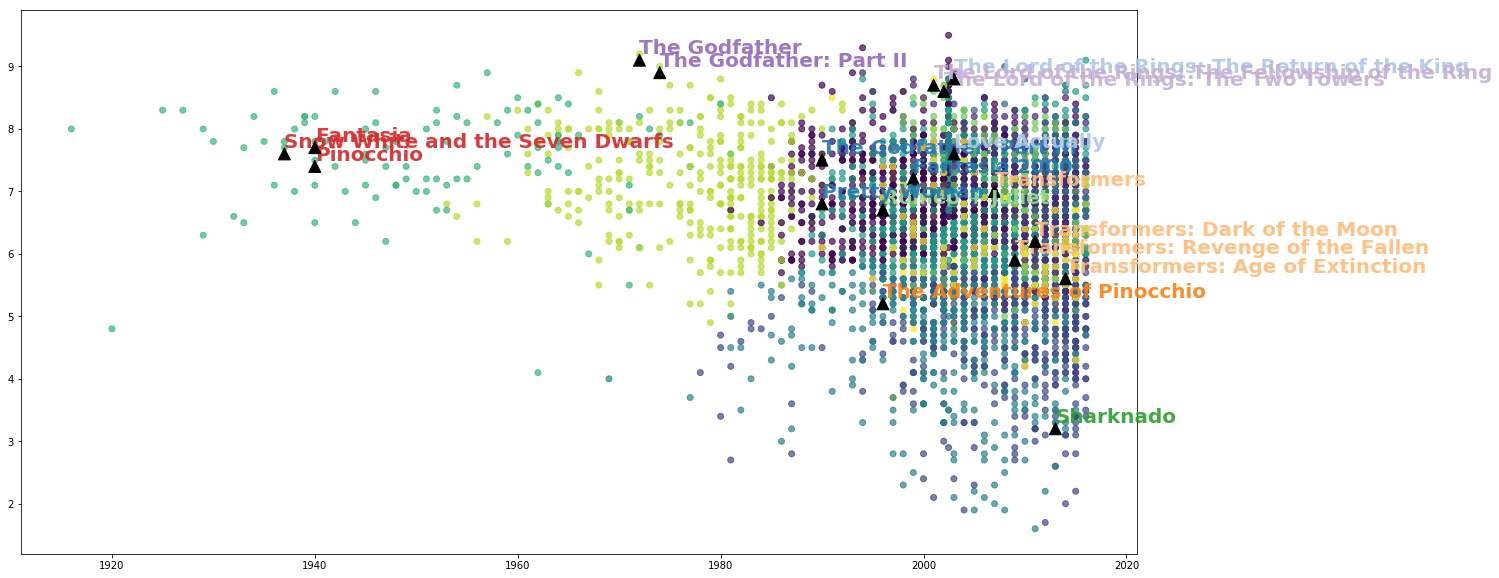

In [15]:
samples = np.array(values_array.loc[:,:])

pipeline.fit(samples)
labels = pipeline.predict(samples)

labels

plt.scatter(samples[:,0], samples[:,1], c=labels, alpha=0.7)
ex_plt_labels(list(samples[:,0]),list(samples[:,1]), c=labels)

Results : May or may not be more accurate, the display is messy

### Trying T-SNE method (too slow and not good)

In [16]:
#from sklearn.manifold import TSNE
#model = TSNE(learning_rate=100)
#tsne_features = model.fit_transform(samples)
#
#xs = tsne_features[:,0]
#ys = tsne_features[:,1]


In [17]:

#plt.scatter(xs,ys)
#ex_plt_labels(xs,ys)
#plt.show()

### We need to turn words itno words frequency arrays
### +dimension reduction

## Extracting word columns

In [18]:
df.describe(include='all')

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio
count,4916,4916.000,4916.000,4916,4916,4916,4916,4916,4916.000,4916,4916,4916,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916,4916,4916.000,4916.000
unique,4916,nan,nan,66,48,914,4757,2398,nan,2096,3031,3520,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,18,2,nan,nan
top,After.Life,nan,nan,USA,English,Drama,,,nan,Robert De Niro,Morgan Freeman,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,R,Color,nan,nan
freq,1,nan,nan,3710,4582,232,152,102,nan,48,18,23,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2367,4712,nan,nan
mean,NaN,2002.453,6.437,NaN,NaN,NaN,NaN,NaN,676.677,NaN,NaN,NaN,6485.200,1617.624,628.313,9579.733,7348.296,266.525,136.617,82645.242,47779121.547,33576517.195,NaN,NaN,107.092,2.096
std,NaN,12.315,1.128,NaN,NaN,NaN,NaN,NaN,2805.134,NaN,NaN,NaN,15098.229,4006.861,1622.642,18164.359,19206.016,372.547,120.418,138322.057,61184608.962,38653472.075,NaN,NaN,25.247,0.289
min,NaN,1916.000,1.600,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,162.000,218.000,NaN,NaN,7.000,1.180
25%,NaN,1999.000,5.800,NaN,NaN,NaN,NaN,NaN,6.000,NaN,NaN,NaN,606.000,275.000,129.000,1394.750,0.000,62.000,47.000,8361.750,8052632.500,7000000.000,NaN,NaN,93.000,1.850
50%,NaN,2005.000,6.600,NaN,NaN,NaN,NaN,NaN,44.000,NaN,NaN,NaN,981.500,592.000,362.000,3049.000,159.000,152.000,106.500,33132.500,36948242.000,23000000.000,NaN,NaN,103.000,2.220
75%,NaN,2010.000,7.200,NaN,NaN,NaN,NaN,NaN,188.000,NaN,NaN,NaN,11000.000,912.000,631.000,13616.750,2000.000,319.250,191.000,93772.750,50875351.250,40000000.000,NaN,NaN,118.000,2.350


In [19]:
df.columns

Index(['movie_title', 'title_year', 'imdb_score', 'country', 'language',
       'genres', 'plot_keywords', 'director_name', 'director_facebook_likes',
       'actor_1_name', 'actor_2_name', 'actor_3_name',
       'actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'movie_facebook_likes', 'num_user_for_reviews',
       'num_critic_for_reviews', 'num_voted_users', 'gross', 'budget',
       'content_rating', 'color', 'duration', 'aspect_ratio'],
      dtype='object')

In [20]:
df_words = df[['country', 'language', 'genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'content_rating', 'color', 'plot_keywords']]
def replace_spaces(feature):
    feature = feature.str.replace(' ', '_')
    feature = feature.str.replace('.', '')
    return feature

df_words = df_words.apply(replace_spaces, axis=1)
        

df.loc[:, 'words'] = (df_words['country']
    +' '+df_words['language']
    +' '+df_words['genres'].str.replace('|', ' ')
    +' '+df_words['genres'].str.replace('|', ' ')
    +' '+df_words['director_name']
    +' '+df_words['director_name']
    +' '+df_words['actor_1_name']
    +' '+df_words['actor_1_name']
    +' '+df_words['actor_2_name']
    +' '+df_words['actor_3_name']
    +' '+df_words['content_rating']
    +' '+df_words['color']
    )

df.loc[:, 'plot_words'] = df_words['plot_keywords'].str.replace('|', ' ')

words_list = list(df['words'])
plot_words_list = list(df['plot_words'])

In [21]:
words_list[0:10]

["USA English Biography Drama Biography Drama Bill_Condon Bill_Condon Brendan_Fraser Brendan_Fraser Lynn_Redgrave Kevin_J_O'Connor R _Black_and_White",
 'USA English Crime Thriller Crime Thriller Brad_Furman Brad_Furman Justin_Timberlake Justin_Timberlake John_Heard David_Costabile R Color',
 'USA English Action Crime Drama Thriller Action Crime Drama Thriller Peter_Howitt Peter_Howitt Tyler_Labine Tyler_Labine Richard_Roundtree Ned_Bellamy PG-13 Color',
 'USA English Fantasy Horror Mystery Thriller Fantasy Horror Mystery Thriller Frank_LaLoggia Frank_LaLoggia Alex_Rocco Alex_Rocco Lukas_Haas Katherine_Helmond R Color',
 'USA English Action Crime Drama Thriller Action Crime Drama Thriller Niels_Arden_Oplev Niels_Arden_Oplev Dominic_Cooper Dominic_Cooper Isabelle_Huppert James_Biberi R Color',
 'USA English Drama Romance Drama Romance Michael_Radford Michael_Radford Al_Pacino Al_Pacino Mackenzie_Crook Kris_Marshall R Color',
 'Germany English Horror Mystery Horror Mystery Victor_Salva V

#### Insert words frequency in a CSR Matrix (Compressed Sparse Row matrix)
We'll use TF-IDF (term frequency–inverse document frequency) to show words frequency

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer
vectorizer  = TfidfVectorizer(min_df=2) 
# Apply fit_transform 
csrm = vectorizer.fit_transform(words_list)
csrm.toarray().shape
df_freq = pd.DataFrame(csrm.toarray(),index=movies_list, columns=vectorizer.get_feature_names())

(4916, 3343)

In [23]:

vectorizer  = TfidfVectorizer(min_df=5) 
plot_csrm = vectorizer.fit_transform(plot_words_list)
plot_csrm.toarray().shape
plot_df_freq = pd.DataFrame(plot_csrm.toarray(),index=movies_list, columns=vectorizer.get_feature_names())

(4916, 996)

In [24]:
ex_df_freq = df_freq.iloc[ex_ilocs]
ex_df_freq.loc[:, ~(ex_df_freq==0).all(axis=0)]

,13,14,action,adventure,al_pacino,animation,approved,baz_luhrmann,bebe_neuwirth,bernard_hill,billy_boyd,bingbing_li,brian_dennehy,bridget_fonda,christopher_lee,colin_firth,color,comedy,crime,drama,english,family,fantasy,fi,francis_ford_coppola,garry_marshall,glenn_morshower,harold_perrineau,hector_elizondo,horror,ian_ziering,italian,james_algar,jason_alexander,joe_mantegna,john_heard,julia_roberts,kelsey_grammer,kevin_dunn,kris_marshall,leonardo_dicaprio,liam_neeson,marlon_brando,martin_landau,michael_bay,michael_o,music,musical,neill,new_zealand,orlando_bloom,peter_jackson,pg,ramon_rodriguez,richard_curtis,robert_de_niro,robert_duvall,romance,sci,sophia_myles,tv,udo_kier,uk,usa,zack_ward
Transformers: Revenge of the Fallen,0.087,0.000,0.193,0.211,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.040,0.000,0.000,0.000,0.042,0.000,0.000,0.242,0.000,0.000,0.568,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.284,0.000,0.000,0.000,0.000,0.000,0.539,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.072,0.300,0.000,0.000,0.000,0.000,0.242,0.000,0.000,0.000,0.000,0.050,0.000
Pinocchio,0.000,0.000,0.000,0.000,0.000,0.494,0.338,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.064,0.000,0.000,0.000,0.066,0.396,0.385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.568,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.079,0.000
Snow White and the Seven Dwarfs,0.000,0.000,0.000,0.000,0.000,0.494,0.338,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.064,0.000,0.000,0.000,0.066,0.396,0.385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.568,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.079,0.000
The Godfather: Part III,0.000,0.000,0.000,0.000,0.566,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.328,0.000,0.000,0.046,0.000,0.241,0.147,0.047,0.000,0.000,0.000,0.620,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.318,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.057,0.000
The Adventures of Pinocchio,0.000,0.000,0.000,0.229,0.000,0.000,0.000,0.000,0.355,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.044,0.000,0.000,0.000,0.000,0.272,0.264,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.296,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.574,0.000,0.000,0.000,0.390,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.293,0.145,0.000,0.000
Fantasia 2000,0.000,0.000,0.000,0.000,0.000,0.366,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.000,0.049,0.294,0.286,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.740,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.378,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.058,0.000
Fantasia,0.000,0.000,0.000,0.000,0.000,0.366,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.000,0.049,0.294,0.286,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.740,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.378,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.058,0.000
Transformers,0.083,0.000,0.184,0.201,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.039,0.000,0.000,0.000,0.040,0.000,0.000,0.231,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.271,0.000,0.000,0.000,0.000,0.000,0.515,0.275,0.000,0.000,0.271,0.000,0.000,0.000,0.068,0.000,0.000,0.000,0.000,0.000,0.231,0.000,0.000,0.000,0.000,0.048,0.561
Romeo + Juliet,0

In [25]:
words_frequencies = pd.Series(df_freq.astype(bool).sum(axis=0))
print('Top 5 words by frequency')
words_frequencies.sort_values(ascending=False)[0:5]
print('Top 2000 words by frequency ( stops of 200 ). They quickly decrease but remain above 3'  )
words_frequencies.sort_values(ascending=False)[0:2000:200]

Top 5 words by frequency


color      4712
english    4582
usa        3710
drama      2533
pg         2110
dtype: int64

Top 2000 words by frequency ( stops of 200 ). They quickly decrease but remain above 3


color              4712
natasha_lyonne       12
gus_van_sant          8
ned_beatty            6
john_doman            5
short                 5
jake_kasdan           4
vanessa_lengies       4
emma_caulfield        3
nora_dunn             3
dtype: int64

In [26]:
print('Dropping',words_frequencies[words_frequencies==1].count(), 'words which only appear once (already dropped by the vectorizer param)')

keep_words_i = list(np.where(words_frequencies>1))[0]
csrm= csrm[:,keep_words_i]

print(csrm.shape[1], 'words remaining')

Dropping 0 words which only appear once (already dropped by the vectorizer param)
3343 words remaining


In [27]:
plot_words_frequencies = pd.Series(plot_df_freq.astype(bool).sum(axis=0))
min_occurence = 5
print('Dropping',plot_words_frequencies[plot_words_frequencies<min_occurence].count(), 'words which appear less than',min_occurence,'times')

keep_words_i = list(np.where(plot_words_frequencies>=min_occurence))[0]
plot_csrm= plot_csrm[:,keep_words_i]

print(plot_csrm.shape[1], 'words remaining')

Dropping 0 words which appear less than 5 times
996 words remaining


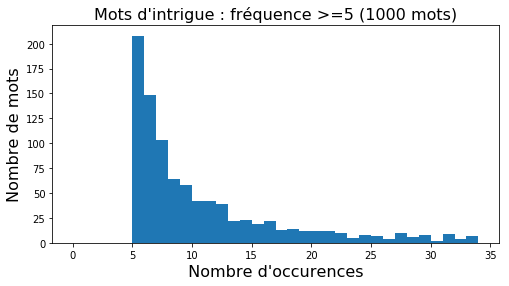

In [28]:
plt.rcParams["figure.figsize"] = (8,4)
plot_words_freq = plt.hist(plot_words_frequencies, bins = range(0,35))

silent = plt.title("Mots d'intrigue : fréquence >=5 (1000 mots)", fontsize=16)
silent = plt.xlabel(" Nombre d'occurences ", fontsize=16)  
silent = plt.ylabel("Nombre de mots", fontsize=16)

In [29]:
import scipy.sparse as sp
csrm =  sp.hstack((csrm,plot_csrm))
print(csrm.shape[1], 'words remaining')

4339 words remaining


<h3> We'll use TruncatedSVD for dimension reduction on our CSR Matrix of words frequencies</h3>
<br>
note: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [30]:
from sklearn.decomposition import TruncatedSVD
# Create a TruncatedSVD instance
n_components = 1475 
tsvd = TruncatedSVD(n_components=n_components) # We can explain 75% of variance with these
tsvd.fit(csrm)
tsvd_features = tsvd.transform(csrm)
tsvd_var_ratios = tsvd.explained_variance_ratio_


TruncatedSVD(algorithm='randomized', n_components=1475, n_iter=5,
       random_state=None, tol=0.0)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
pca.fit(csrm.toarray())
pca_features = pca.transform(csrm.toarray())
pca_var_ratios = pca.explained_variance_ratio_

PCA(copy=True, iterated_power='auto', n_components=1475, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 1475 artists>

Text(0.5,0,'TSVD feature')

Text(0,0.5,'variance')

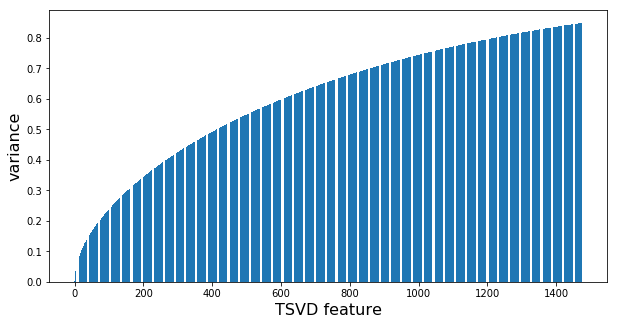

In [32]:
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(list(range(n_components)), np.cumsum(tsvd_var_ratios))
plt.xlabel('TSVD feature',  fontsize=16)
plt.ylabel('variance',  fontsize=16)
#plt.xticks(list(range(1900)))
#plt.show()
#plt.bar(list(range(1000)), pca_var_ratios)
#plt.xlabel('PCA feature')
#plt.ylabel('variance')

<BarContainer object of 1475 artists>

Text(0.5,0,'PCA feature')

Text(0,0.5,'variance')

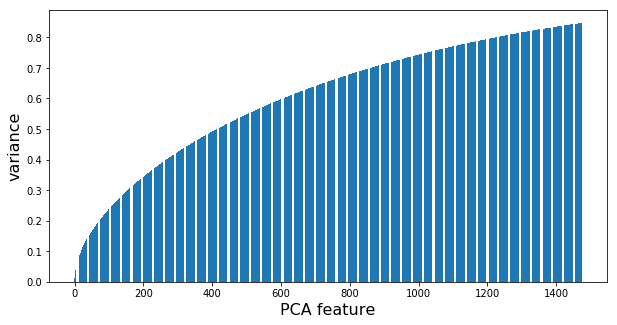

In [33]:
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(list(range(n_components)), np.cumsum(pca_var_ratios))
plt.xlabel('PCA feature',  fontsize=16)
plt.ylabel('variance',  fontsize=16)
#plt.xticks(list(range(1900)))
#plt.show()
#plt.bar(list(range(1000)), pca_var_ratios)
#plt.xlabel('PCA feature')
#plt.ylabel('variance')

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20)
kmeans.fit(tsvd_features)
labels = kmeans.predict(tsvd_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
df[['kmean_cluster_20']] = pd.DataFrame(labels )
df.iloc[ex_ilocs, :].sort_values('kmean_cluster_20')

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio,words,plot_words,kmean_cluster_20
3848,The Lord of the Rings: The Two Towers,2002.000,8.700,USA,English,Action|Adventure|Drama|Fantasy,epic|evil wizard|middle earth|ring|wizard,Peter Jackson,0.000,Christopher Lee,Orlando Bloom,Billy Boyd,16000.000,5000.000,857.000,23052,10000,2417.000,294.000,1100446,340478898.000,94000000.000,PG-13,Color,172.000,2.350,USA English Action Adventure Drama Fantasy Act...,epic evil_wizard middle_earth ring wizard,1
4370,The Lord of the Rings: The Fellowship of the Ring,2001.000,8.800,New Zealand,English,Action|Adventure|Drama|Fantasy,elf|hobbit|middle earth|quest|ring,Peter Jackson,0.000,Christopher Lee,Orlando Bloom,Billy Boyd,16000.000,5000.000,857.000,22342,21000,5060.000,297.000,1238746,313837577.000,93000000.000,PG-13,Color,171.000,2.350,New_Zealand English Action Adventure Drama Fan...,elf hobbit middle_earth quest ring,1
4197,The Lord of the Rings: The Return of the King,2003.000,8.900,USA,English,Action|Adventure|Drama|Fantasy,battle|epic|king|orc|ring,Peter Jackson,0.000,Orlando Bloom,Billy Boyd,Bernard Hill,5000.000,857.000,416.000,6434,16000,3189.000,328.000,1215718,377019252.000,94000000.000,PG-13,Color,192.000,2.350,USA English Action Adventure Drama Fantasy Act...,battle epic king orc ring,1
2104,The Godfather: Part III,1990.000,7.600,USA,English,Crime|Drama,1970s|family relationships|mob hit|opera|repea...,Francis Ford Coppola,0.000,Al Pacino,Joe Mantegna,Bridget Fonda,14000.000,1000.000,889.000,16949,0,545.000,110.000,267980,66676062.000,54000000.000,R,Color,170.000,1.850,USA English Crime Drama Crime Drama Francis_Fo...,1970s family_relationships mob_hit opera repea...,2
4694,The Godfather,1972.000,9.200,USA,English,Crime|Drama,crime family|mafia|organized crime|patriarch|r...,Francis Ford Coppola,0.000,Al Pacino,Marlon Brando,Robert Duvall,14000.000,10000.000,3000.000,28122,43000,2238.000,208.000,1155770,134821952.000,6000000.000,R,Color,175.000,1.850,USA English Crime Drama Crime Drama Francis_Fo...,crime_family mafia organized_crime patriarch r...,2
4129,The Godfather: Part II,1974.000,9.000,USA,English,Crime|Drama,1950s|corrupt politician|lake tahoe nevada|mel...,Francis Ford Coppola,0.000,Robert De Niro,Al Pacino,Robert Duvall,22000.000,14000.000,3000.000,39960,14000,650.000,149.000,790926,57300000.000,13000000.000,R,Color,220.000,1.850,USA English Crime Drama Crime Drama Francis_Fo...,1950s corrupt_politician lake_tahoe_nevada mel...,2
1976,Pinocchio,1940.000,7.500,USA,English,Animation|Family|Fantasy|Musical,boy|conscience|fairy|jiminy cricket|pinocchio,Norman Ferguson,3.000,Mel Blanc,Dickie Jones,Cliff Edwards,1000.000,48.000,40.000,1178,0,147.000,105.000,90360,84300000.000,2600000.000,Approved,Color,88.000,1.370,USA English Animation Family Fantasy Musical A...,boy conscience fairy jiminy_cricket pinocchio,3
2085,Snow White and the Seven Dwarfs,1937.000,7.700,USA,English,Animation|Family|Fantasy|Musical,dwarf|love|princess|queen|snow white,William Cottrell,0.000,Adriana Caselotti,Billy Gilbert,Lucille La Verne,82.000,47.000,31.000,229,0,204.000,145.000,133348,184925485.000,2000000.000,Approved,Color,83.000,1.370,USA English Animation Family Fantasy Musical A...,dwarf love princess queen snow_white,3
3105,Fantasia 2000,1999.000,7.300,USA,English,Animation|Family|Fantasy|Music,abstract|ark|disney|fairy tale|piano,James Algar,11.000,Quincy Jones,Penn Jillette,Russi Taylor,340.000,243.000,62.000,814,607,186.000,129.000,27543,60507228.000,80000000.000,G,Color,74.000,1.780,USA English Animation Family Fantasy Music Ani...,abstract ark disney fairy_tale piano,3
3700,Fantasia,1940.000,7.800,USA,English,An

#### Pretty good results already with nice clusters !
<br>
## Trying out  2D  representation of our results 

In [36]:
#For 2D display only, we'll calculate a 2Ns NMF 
from sklearn.decomposition import NMF 
nmf =NMF(n_components = 2)
nmf.fit(csrm)
nmf_features = nmf.transform(csrm)


NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=2, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)


C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


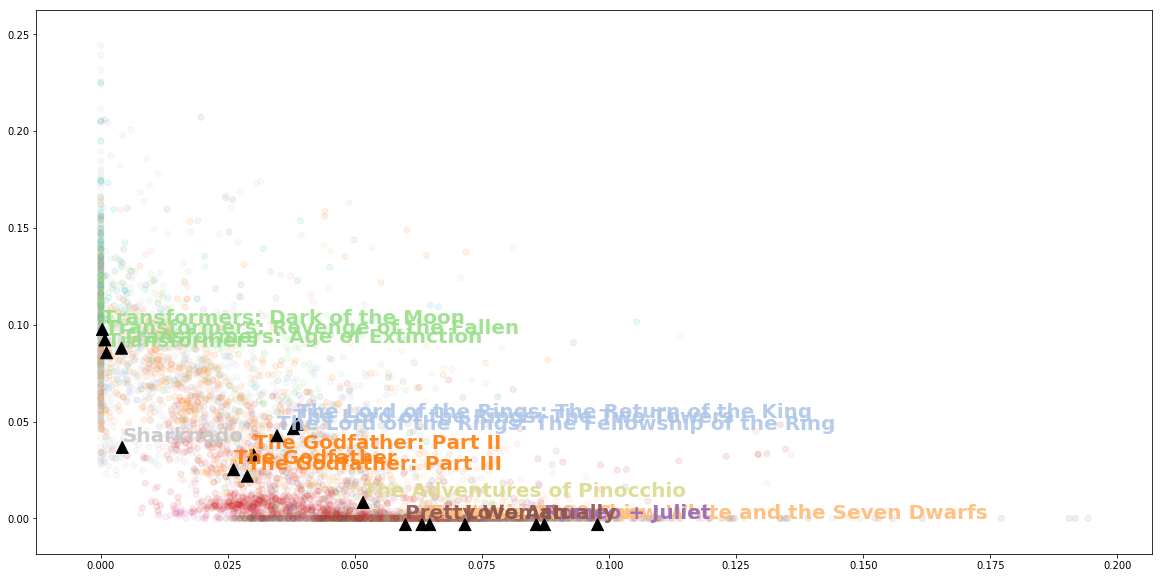

In [37]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(nmf_features[:,0], nmf_features[:,1], c=labels, alpha=0.1, cmap='tab20')
    
ex_plt_labels(list(nmf_features[:,0]),list(nmf_features[:,1]), c= labels, cmap='tab20')

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)


C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


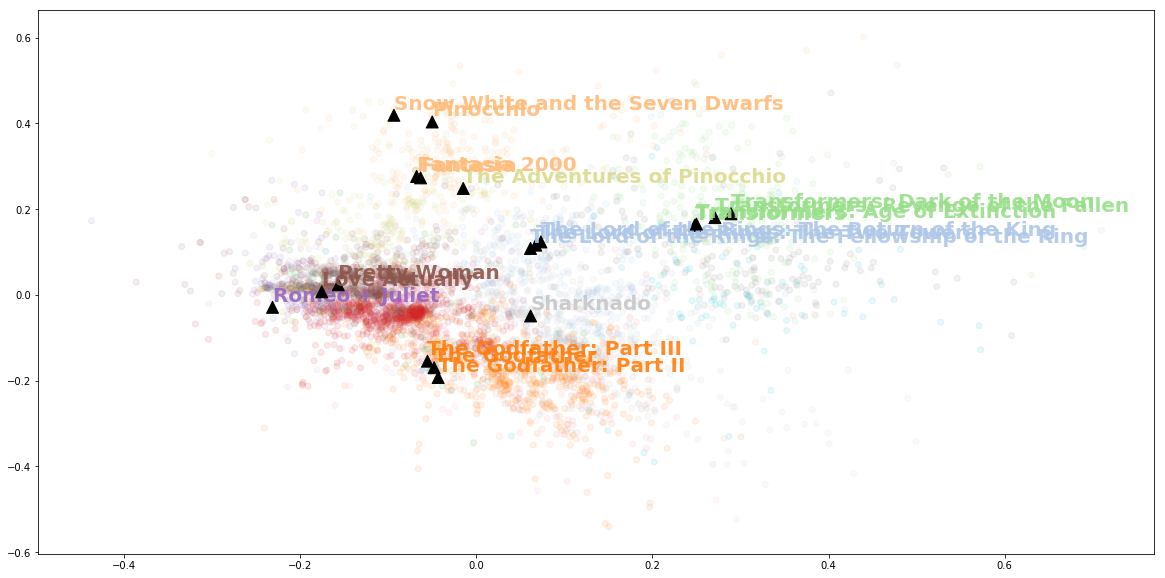

In [38]:
from sklearn.decomposition import PCA 
pca =PCA(n_components = 2)
pca.fit(csrm.toarray())
pca_features = pca.transform(csrm.toarray())

plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(pca_features[:,0], pca_features[:,1], c=labels, alpha=0.1, cmap='tab20')
    
ex_plt_labels(list(pca_features[:,0]),list(pca_features[:,1]), c= labels, cmap='tab20')

### Trying out a 3D representation over NMF axis
#### Still using kmean clusters

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=3, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)


C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


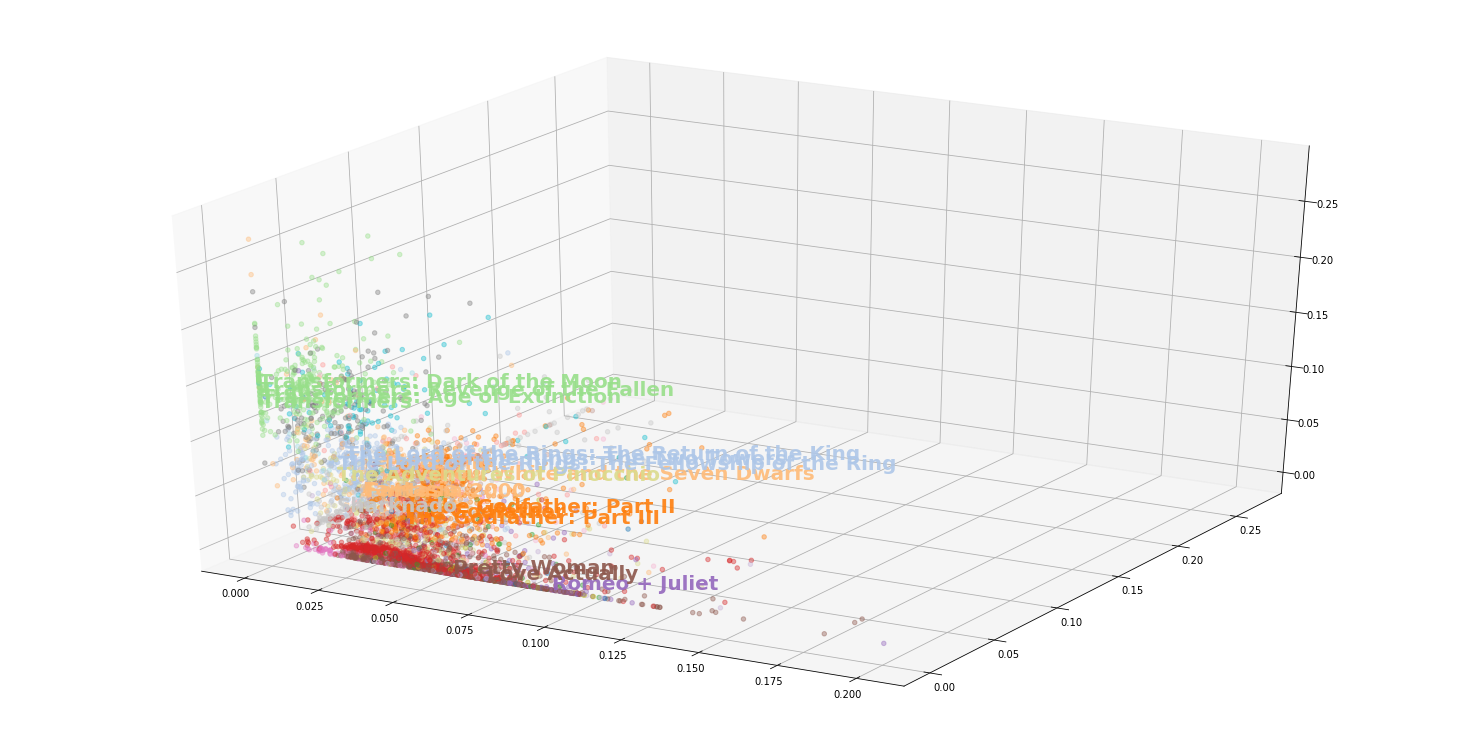

In [39]:
from mpl_toolkits.mplot3d import Axes3D 
nmf =NMF(n_components = 3)
nmf.fit(csrm)
nmf_features = nmf.transform(csrm)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(nmf_features[:,0], nmf_features[:,1], nmf_features[:,2], c= labels, alpha=0.4, cmap='tab20')

x = nmf_features[:,0]
y = nmf_features[:,1]
z = nmf_features[:,2]
c= labels
cmap='tab20'
labels_list = movies_list

custom_cmap = plt.get_cmap(cmap)
cmaplist = [custom_cmap(i) for i in range(custom_cmap.N)]
print(cmaplist[0])
color = 'red'
for iloc in ex_ilocs:
    if  c!='default':
        movie_group = c[iloc]
        color = cmaplist[movie_group]
    hfont = {'weight':'bold', 'color':color}
    silent = ax.text(x[iloc], y[iloc]
            ,z[iloc]
            ,labels_list[iloc]
                , fontsize=20
                , alpha=0.9
            ,  zorder=1
                ,**hfont
                )
plt.show()
    
#ex_plt_labels(list(nmf_features[:,0]),list(nmf_features[:,1]), c= labels, cmap='tab20')

#### Problem : We only have 20 clusters here
<br> Increasing to kmeans clusters would be too long (unless we reduce dimensions much more?)
<br> +We would get uneven clusters

## Dendrogram Visual - agglomerative clustering

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet

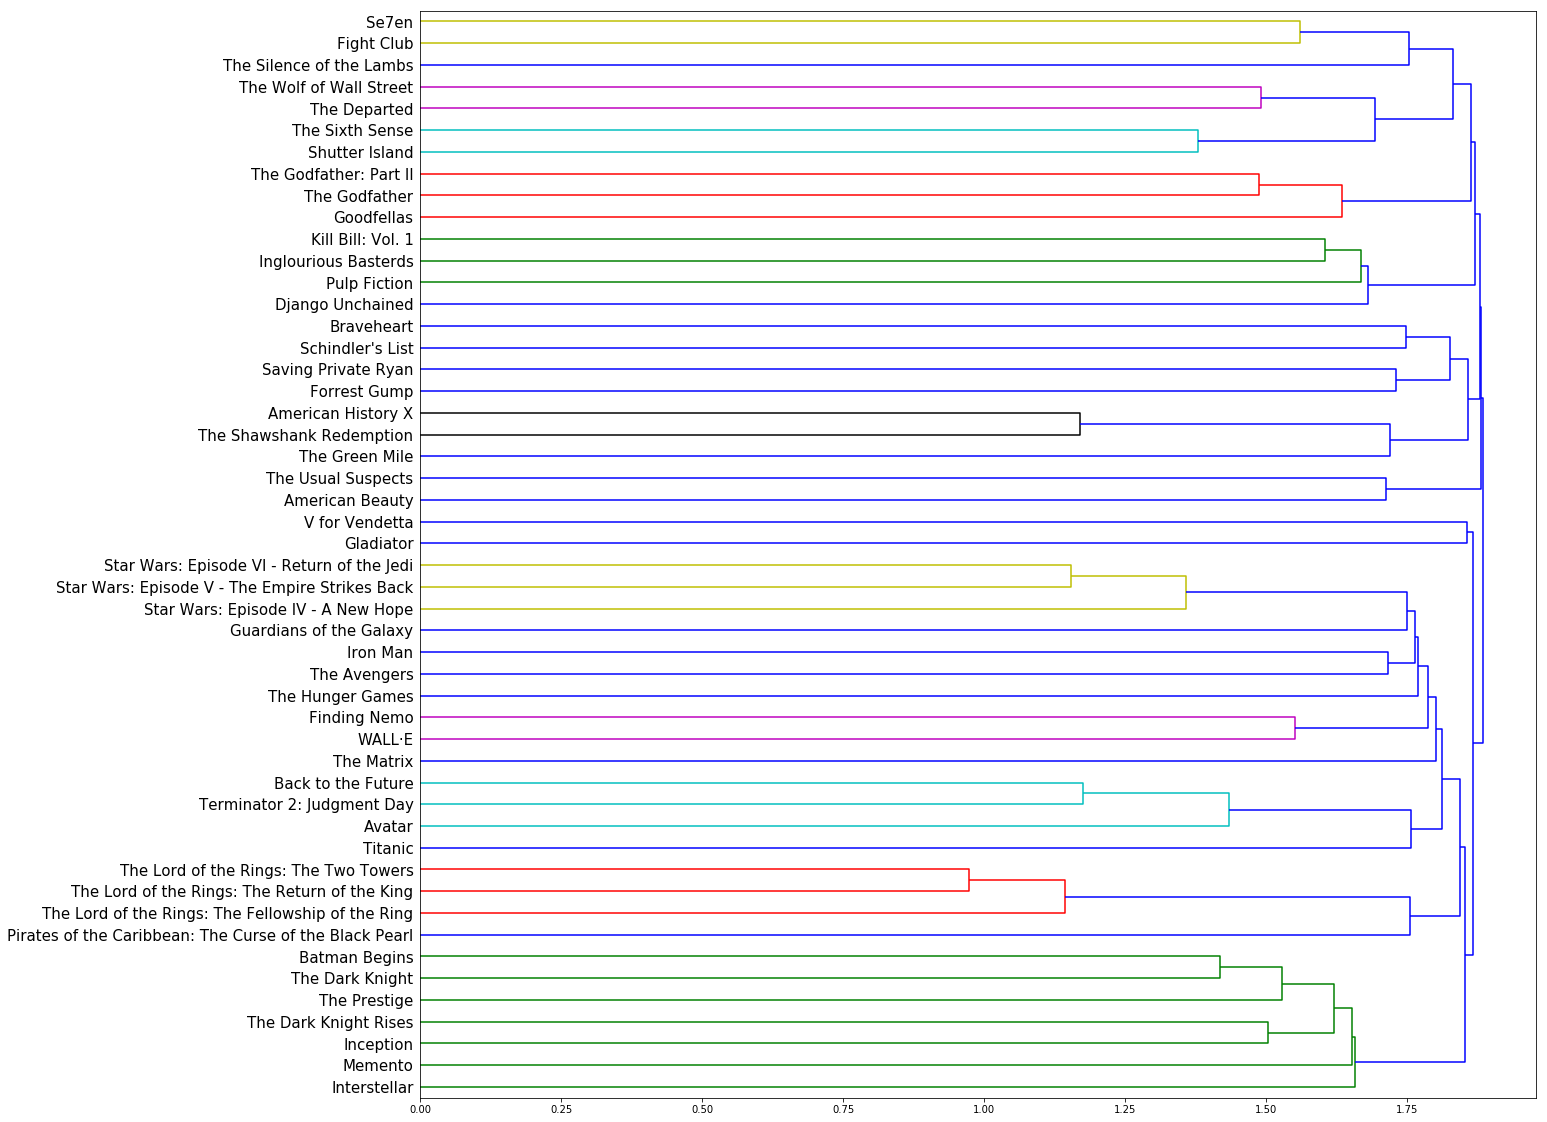

In [41]:
#Top 50 voted movies
high_voted_movies = df.sort_values('num_voted_users', ascending =False).head(50).index.tolist()

mergings = linkage(tsvd_features[high_voted_movies], method= 'average')
plt.rcParams["figure.figsize"] = (20,20)


plot = dendrogram(mergings,
           labels=df.loc[high_voted_movies,'movie_title'].tolist(),
           color_threshold = 0.89*max(mergings[:,2]),
           orientation="right",
           leaf_font_size=15,
)
plt.show()

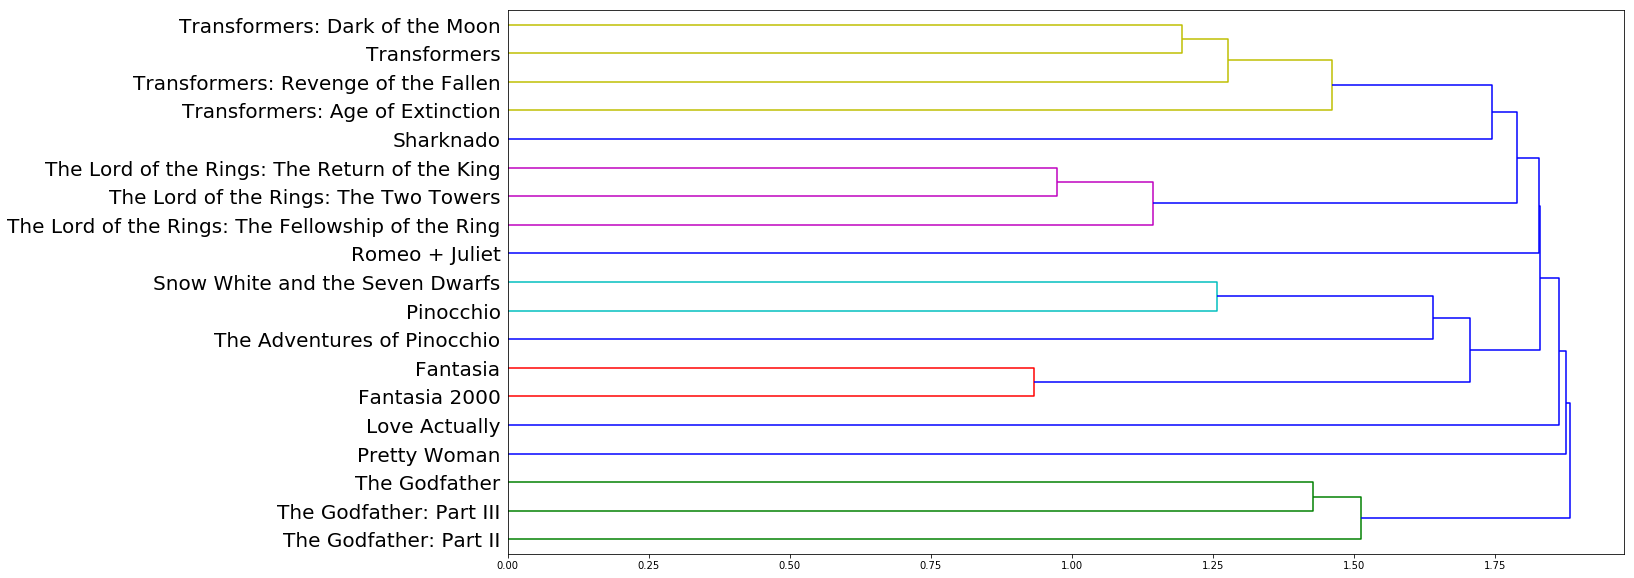

In [42]:
#Top 50 voted movies

mergings = linkage(tsvd_features[ex_ilocs], method= 'average')
plt.rcParams["figure.figsize"] = (20,10)


plot = dendrogram(mergings,
           labels=df.loc[ex_ilocs,'movie_title'].tolist(),
           color_threshold = 0.85*max(mergings[:,2]),
           orientation="right",
           leaf_font_size=20,
)
plt.show()

#### Results 
Good grouping of films !
With notion of height 
. Problem is that height can lead to lots of links 

#### Trying to get usefull groups from it

In [43]:
mergings = linkage(tsvd_features, method= 'average')

In [44]:
labels = fcluster(mergings ,t=1.1, criterion='distance')

df.loc[:,'dendogram_cluster'] =labels

df.loc[high_voted_movies, :].sort_values('dendogram_cluster')

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio,words,plot_words,kmean_cluster_20,dendogram_cluster
4694,The Godfather,1972.000,9.200,USA,English,Crime|Drama,crime family|mafia|organized crime|patriarch|r...,Francis Ford Coppola,0.000,Al Pacino,Marlon Brando,Robert Duvall,14000.000,10000.000,3000.000,28122,43000,2238.000,208.000,1155770,134821952.000,6000000.000,R,Color,175.000,1.850,USA English Crime Drama Crime Drama Francis_Fo...,crime_family mafia organized_crime patriarch r...,2,4
4129,The Godfather: Part II,1974.000,9.000,USA,English,Crime|Drama,1950s|corrupt politician|lake tahoe nevada|mel...,Francis Ford Coppola,0.000,Robert De Niro,Al Pacino,Robert Duvall,22000.000,14000.000,3000.000,39960,14000,650.000,149.000,790926,57300000.000,13000000.000,R,Color,220.000,1.850,USA English Crime Drama Crime Drama Francis_Fo...,1950s corrupt_politician lake_tahoe_nevada mel...,2,5
4524,The Departed,2006.000,8.500,USA,English,Crime|Drama|Thriller,boston|mole|police|undercover|undercover cop,Martin Scorsese,17000.000,Leonardo DiCaprio,Matt Damon,Ray Winstone,29000.000,13000.000,1000.000,45648,29000,2054.000,352.000,873649,132373442.000,90000000.000,R,Color,151.000,2.350,USA English Crime Drama Thriller Crime Drama T...,boston mole police undercover undercover_cop,7,75
4898,The Wolf of Wall Street,2013.000,8.200,USA,English,Biography|Comedy|Crime|Drama,based on true story|fellatio|female rear nudit...,Martin Scorsese,17000.000,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000.000,11000.000,4000.000,46057,138000,1138.000,606.000,780588,116866727.000,100000000.000,R,Color,240.000,2.350,USA English Biography Comedy Crime Drama Biogr...,based_on_true_story fellatio female_rear_nudit...,2,77
4102,The Sixth Sense,1999.000,8.100,USA,English,Drama|Mystery|Thriller,able to see the dead|ghost|plot twist|psychic|...,M. Night Shyamalan,0.000,Bruce Willis,Haley Joel Osment,Olivia Williams,13000.000,3000.000,766.000,17540,14000,2073.000,234.000,704766,293501675.000,40000000.000,PG-13,Color,107.000,1.850,USA English Drama Mystery Thriller Drama Myste...,able_to_see_the_dead ghost plot_twist psychic ...,2,102
4751,Shutter Island,2010.000,8.100,USA,English,Mystery|Thriller,female prisoner|plot twist|self delusion|surpr...,Martin Scorsese,17000.000,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000.000,223.000,163.000,29585,53000,964.000,490.000,786092,127968405.000,80000000.000,R,Color,138.000,2.350,USA English Mystery Thriller Mystery Thriller ...,female_prisoner plot_twist self_delusion surpr...,2,103
3838,Iron Man,2008.000,7.900,USA,English,Action|Adventure|Sci-Fi,afghanistan|billionaire|inventor|playboy|u.s. ...,Jon Favreau,4000.000,Robert Downey Jr.,Jeff Bridges,Jon Favreau,21000.000,12000.000,4000.000,39252,10000,1055.000,486.000,696338,318298180.000,140000000.000,PG-13,Color,126.000,2.350,USA English Action Adventure Sci-Fi Action Adv...,afghanistan billionaire inventor playboy us_ai...,5,111
4042,Kill Bill: Vol. 1,2003.000,8.100,USA,English,Action,bride|coma|japan|revenge|sword,Quentin Tarantino,16000.000,David Carradine,Vivica A. Fox,Chiaki Kuriyama,926.000,890.000,640.000,3983,13000,2105.000,354.000,735784,70098138.000,30000000.000,R,Black and White,111.000,2.350,USA English Action Action Quentin_Tarantino Qu...,bride coma japan revenge sword,1,216
4713,Pulp Fiction,1994.000,8.900,USA,English,Crime|Drama,black comedy|cunnilingus|neo noir|nonlinear ti...,Quentin Tarantino,16000.000,Bruce Willis,Eric Stoltz,Phil LaMarr,13000.000,902.000,857.000,16557,45000,2195.000,215.000,1324680,107930000.000,8000000.000,R,Color,178.000,2.350,USA English Crime Drama Crime Drama Quentin_Ta...,black_comedy cunnilingus neo_n

### Trying out Nearest neighbors

In [45]:
from sklearn.neighbors import NearestNeighbors
import time

t = time.time()
nn =  NearestNeighbors(n_neighbors=5, metric='euclidean')
nn.fit(tsvd_features)
distances, indices = nn.kneighbors(tsvd_features)
print(time.time()-t ,'seconds timed.')

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

55.82700037956238 seconds timed.


In [46]:
movie_name = 'Transformers'
associated_ids = indices[df[df['movie_title']==movie_name].index].flatten()
print(movie_name,'Associated to')
df.loc[associated_ids,'movie_title']

Transformers Associated to


3802      Transformers
2808       Restoration
4579         I Origins
3432           Re-Kill
2246    Bang Bang Baby
Name: movie_title, dtype: object

#### Switching to a pure distance metric (as we don't actually need groups / visualisation)

In [65]:
from scipy.spatial.distance import pdist,squareform 

t = time.time()
pdist_matrix = pdist(tsvd_features, metric ='euclidean')
pdist_square = squareform(pdist_matrix)
df_pdist = pd.DataFrame(pdist_square, index = movies_list, columns =movies_list )
print(time.time()-t ,'seconds timed.')

18.04900026321411 seconds timed.


In [48]:
#nmf test
#mf=NMF(n_components=150)
#mf_features = nmf.fit_transform(csrm)
#f_nmf = pd.DataFrame(nmf_features, index=movies_list)
#df_nmf.dot(df_nmf.loc['The Dark Knight Rises']).nlargest(10)

In [49]:
df_pdist.loc[:,'Transformers'].sort_values().head(5)

Transformers     0.000
Restoration      0.811
I Origins        0.945
Re-Kill          1.006
Bang Bang Baby   1.012
Name: Transformers, dtype: float64

In [50]:
df_pdist.loc[:,'The Dark Knight Rises'].sort_values().head(5)

The Dark Knight Rises   0.000
Stone                   1.383
Checkmate               1.405
Broken Horses           1.408
Wind Walkers            1.411
Name: The Dark Knight Rises, dtype: float64

In [51]:
df_pdist.loc[:,'Snow White and the Seven Dwarfs'].sort_values().head(5)

Snow White and the Seven Dwarfs   0.000
Rugrats Go Wild                   1.162
Dancin' It's On                   1.183
Dragon Nest: Warriors' Dawn       1.196
Thunder and the House of Magic    1.197
Name: Snow White and the Seven Dwarfs, dtype: float64

#### Not what was expected , adding other features


In [52]:
values_array.columns

Index(['title_year', 'imdb_score', 'num_critic_for_reviews', 'budget',
       'aspect_ratio'],
      dtype='object')

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(values_array)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
new_features = scaler.transform(values_array)

In [55]:
all_features = np.hstack((tsvd_features, new_features))
#testing without dim reduction
#all_features = np.hstack((csrm.toarray(), new_features))

Recalculating distance matrix

In [80]:

t = time.time()
pdist_matrix = pdist(all_features)
pdist_square = squareform(pdist_matrix)
df_pdist = pd.DataFrame(pdist_square, index = movies_list, columns =movies_list )
print(time.time()-t ,'seconds timed.')

df_movies = df.set_index(df['movie_title'])


19.408995628356934 seconds timed.


In [81]:
df_pdist.loc[:,['Django Unchained']]

,Django Unchained
Gods and Monsters,2.069
Runner Runner,2.058
Antitrust,2.062
Lady in White,2.035
Dead Man Down,1.978
The Merchant of Venice,2.029
Jeepers Creepers,2.056
Bill & Ted's Excellent Adventure,2.120
Miss Potter,2.026
Oliver!,2.122


In [82]:
df_pdist.loc[:,'Django Unchained'].sort_values().head(5)
columns =['title_year', 'imdb_score', 'genres', 'director_name', 'actor_1_name','actor_2_name','actor_3_name']
pd.merge(df_pdist.loc[:,['Django Unchained']].sort_values('Django Unchained').head(5)
          ,df_movies.loc[df_pdist.loc[:,'Django Unchained'].sort_values().head(5).index, columns])


Django Unchained     0.000
Compliance           1.606
Skyfall              1.609
The Hateful Eight    1.616
The Social Network   1.619
Name: Django Unchained, dtype: float64

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [58]:
df_pdist.loc[:,'The Dark Knight Rises'].sort_values().head(10)

The Dark Knight Rises   0.000
Skyfall                 1.544
Inception               1.549
The Dark Knight         1.597
Batman Begins           1.658
Elysium                 1.678
Need for Speed          1.706
The Matrix Reloaded     1.729
Transformers            1.731
Interstellar            1.732
Name: The Dark Knight Rises, dtype: float64

In [59]:
df_pdist.loc[:,'Snow White and the Seven Dwarfs'].sort_values().head(10)

Snow White and the Seven Dwarfs       0.000
Pinocchio                             1.258
1776                                  1.399
Rugrats Go Wild                       1.413
The Hunchback of Notre Dame           1.426
Mary Poppins                          1.446
Thunder and the House of Magic        1.478
Willy Wonka & the Chocolate Factory   1.478
Dragon Nest: Warriors' Dawn           1.479
Aladdin                               1.508
Name: Snow White and the Seven Dwarfs, dtype: float64

In [61]:
df_movies.loc[df_pdist.loc[:,'Iron Man'].sort_values().head(10).index, :]


,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio,words,plot_words,kmean_cluster_20,dendogram_cluster
Iron Man,Iron Man,2008.000,7.900,USA,English,Action|Adventure|Sci-Fi,afghanistan|billionaire|inventor|playboy|u.s. ...,Jon Favreau,4000.000,Robert Downey Jr.,Jeff Bridges,Jon Favreau,21000.000,12000.000,4000.000,39252,10000,1055.000,486.000,696338,318298180.000,140000000.000,PG-13,Color,126.000,2.350,USA English Action Adventure Sci-Fi Action Adv...,afghanistan billionaire inventor playboy us_ai...,5,111
Iron Man 2,Iron Man 2,2010.000,7.000,USA,English,Action|Adventure|Sci-Fi,hammer|military|monaco|revenge|tony stark,Jon Favreau,4000.000,Robert Downey Jr.,Scarlett Johansson,Jon Favreau,21000.000,19000.000,4000.000,48638,18000,723.000,453.000,522371,312057433.000,200000000.000,PG-13,Color,124.000,2.350,USA English Action Adventure Sci-Fi Action Adv...,hammer military monaco revenge tony_stark,5,1067
Sherlock Holmes,Sherlock Holmes,2009.000,7.600,USA,English,Action|Adventure|Crime|Mystery|Thriller,black magic|bridge construction|professor mori...,Guy Ritchie,0.000,Robert Downey Jr.,Eddie Marsan,Robert Maillet,21000.000,979.000,727.000,23996,20000,621.000,415.000,477300,209019489.000,90000000.000,PG-13,Color,128.000,1.850,USA English Action Adventure Crime Mystery Thr...,black_magic bridge_construction professor_mori...,2,4350
I Origins,I Origins,2014.000,7.300,USA,English,Drama|Romance|Sci-Fi,buddhism|evolution|eye|reincarnation|stuck in ...,Mike Cahill,135.000,Steven Yeun,Cara Seymour,Venida Evans,7000.000,71.000,11.000,7098,32000,160.000,140.000,75633,334658.000,39752620.440,R,Color,106.000,2.390,USA English Drama Romance Sci-Fi Drama Romance...,buddhism evolution eye reincarnation stuck_in_...,14,4375
The Matrix Reloaded,The Matrix Reloaded,2003.000,7.200,USA,English,Action|Sci-Fi,car motorcycle chase|one against many|oracle|p...,Lana Wachowski,0.000,Steve Bastoni,Daniel Bernhardt,Helmut Bakaitis,234.000,198.000,30.000,534,0,2789.000,275.000,421818,281492479.000,150000000.000,R,Color,138.000,2.350,USA English Action Sci-Fi Action Sci-Fi Lana_W...,car_motorcycle_chase one_against_many oracle p...,5,4375
Elysium,Elysium,2013.000,6.600,USA,English,Action|Drama|Sci-Fi|Thriller,christ figure|class differences|messiah|saviou...,Neill Blomkamp,662.000,Matt Damon,Sharlto Copley,Alice Braga,13000.000,2000.000,1000.000,17689,61000,814.000,476.000,338087,93050117.000,115000000.000,R,Color,109.000,2.350,USA English Action Drama Sci-Fi Thriller Actio...,christ_figure class_differences messiah saviou...,5,4375
Transformers,Transformers,2007.000,7.100,USA,English,Action|Adventure|Sci-Fi,alien contact|autobot|decepticon|robot vs. rob...,Michael Bay,0.000,Zack Ward,Michael O'Neill,Kevin Dunn,662.000,599.000,581.000,2333,8000,1782.000,396.000,513158,318759914.000,150000000.000,PG-13,Color,144.000,2.350,USA English Action Adventure Sci-Fi Action Adv...,alien_contact autobot decepticon robot_vs_robo...,5,4334
The Wolverine,The Wolverine,2013.000,6.700,USA,English,Action|Adventure|Sci-Fi|Thriller,healing power|marvel comics|mecha|regeneration...,James Mangold,446.000,Hugh Jackman,Tao Okamoto,Rila Fukushima,20000.000,992.000,929.000,23755,68000,533.000,440.000,328067,132550960.000,120000000.000,PG-13,Color,138.000,2.350,USA English Action Adventure Sci-Fi Thriller A...,healing_power marvel_comics mecha regeneration...,5,4370
Need for Speed,Need for Speed,2014.000,6.500,USA,English,Action|Crime|Drama|Thriller,cross country|custom car|illegal street racing...,Scott Waugh,76.000,Rami Malek,Dominic Cooper,Ramon Rodriguez,3000.000,3000.000,464.000,7081,32000,346.000,327.000,136954,43568507.000,66000000.000,PG-13,Color,132.000,